# Conection to the Prometheus

In [ ]:
from prometheus_api_client import PrometheusConnect
from datetime import datetime, timedelta  
import pandas as pd 
import yaml
import json
prom = PrometheusConnect(url ="http://192.168.56.10:30090", disable_ssl=True)
prom

# Fetch All Metric Names

In [ ]:
# Fetch all metric names
all_metrics = prom.all_metrics()
print(f'{len(all_metrics)} metrics found')

# Define the file path where you want to save the metrics
file_path = 'prometheus_metrics.txt'

# Write all metrics to the text file, one per line
with open(file_path, 'w') as file:
    for metric in all_metrics:
        file.write(metric + '\n')

print(f"Metrics have been saved to {file_path}.")

# Query a Metric

In [ ]:
# Define a starting point for data collection.
start_time = datetime.now() - timedelta(days=1)

# Current time for the end of data collection
end_time = datetime.now()

# Step size for queries (e.g., "15m" for 15 minutes)
step = '1m'

# Define the metric you want to query
metric = 'node_cpu_seconds_total'

# Perform a range query for the metric
result_range = prom.custom_query_range(
    query=metric,
    start_time=start_time,
    end_time=end_time,
    step=step
    )

print(json.dumps(result_range, indent=4))

## Backup Whole Database

In [ ]:
import json
import gzip
import os
from prometheus_api_client import PrometheusConnect
from datetime import datetime, timedelta

# Setup connection
prom = PrometheusConnect(url ="http://192.168.56.10:30090", disable_ssl=True)

# Fetch all metric names
all_metrics = prom.all_metrics()

# Define a starting point for data collection
start_time = datetime.now() - timedelta(days=1)  # Example: 5 years ago
end_time = datetime.now()  # Current time
step = '2m'  # Step size

# if there is no path and dir is not exist will create it recursively
path = f"../data_json/{datetime.now().strftime('%Y%m%d')}/"

os.makedirs(path, exist_ok=True)


for metric in all_metrics:
    # Perform a range query for each metric
    result_range = prom.custom_query_range(
        query=metric,
        start_time=start_time,
        end_time=end_time,
        step=step
    )

    # Define file path
    file_path = path+f'{metric.replace("/", "_")}.json'  # Replace '/' with '_' to avoid path issues

    # Write data to a gzipped JSON file
    with open(file_path, 'wt', encoding='utf-8') as file:
        json.dump(result_range, file, indent=4)

    print(f"Data for {metric} has been saved to {file_path}.")


# Filter JSON

In [ ]:
%reset -f
import importlib as imp
import helper as hp
imp.reload(hp)

cpu = hp.filter_filenames(path='../data_json/20240420/json/',
                    substrings=['cpu', 'pod'], 
                    and_or='and')

cpu

# READ JSON

In [74]:
%reset -f
import json
import helper as hp
# Read JSON data from a gzipped file
file_path = '../data_json/20240420/json/node_cpu_seconds_total.json'
hp.read_json(file_path)

File: <_io.TextIOWrapper name='../data_json/20240420/json/node_cpu_seconds_total.json' mode='rt' encoding='utf-8'>

--- keys ------------------------------------------------------------
dict_keys(['metric', 'values'])
--- Metric Keys -----------------------------------------------------
dict_keys(['__name__', 'container', 'cpu', 'endpoint', 'instance', 'job', 'mode', 'namespace', 'pod', 'service'])

Unique values in each column except values columns: ------------------
metric.__name__: ['node_cpu_seconds_total']
metric.container: ['node-exporter']
metric.cpu: ['0' '1' '10' '11' '12' '13' '2' '3' '4' '5' '6' '7' '8' '9']
metric.endpoint: ['http-metrics']
metric.instance: ['192.168.56.10:9100' '192.168.56.11:9100' '192.168.56.12:9100']
metric.job: ['node-exporter']
metric.mode: ['idle' 'iowait' 'irq' 'nice' 'softirq' 'steal' 'system' 'user']
metric.namespace: ['prometheus']
metric.pod: ['prometheus-prometheus-node-exporter-5t6b5'
 'prometheus-prometheus-node-exporter-4mkg9'
 'prometheus-

,values,metric.__name__,metric.container,metric.cpu,metric.endpoint,metric.instance,metric.job,metric.mode,metric.namespace,metric.pod,metric.service
0,"[[1713596861, 159.25], [1713596981, 276.08], [...",node_cpu_seconds_total,node-exporter,0,http-metrics,192.168.56.10:9100,node-exporter,idle,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
1,"[[1713596861, 0.56], [1713596981, 0.57], [1713...",node_cpu_seconds_total,node-exporter,0,http-metrics,192.168.56.10:9100,node-exporter,iowait,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
2,"[[1713596861, 0], [1713596981, 0], [1713597101...",node_cpu_seconds_total,node-exporter,0,http-metrics,192.168.56.10:9100,node-exporter,irq,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
3,"[[1713596861, 0], [1713596981, 0], [1713597101...",node_cpu_seconds_total,node-exporter,0,http-metrics,192.168.56.10:9100,node-exporter,nice,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
4,"[[1713596861, 0.31], [1713596981, 0.45], [1713...",node_cpu_seconds_total,node-exporter,0,http-metrics,192.168.56.10:9100,node-exporter,softirq,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
...,...,...,...,...,...,...,...,...,...,...,...
139,"[[1713596861, 0], [1713596981, 0], [1713597101...",node_cpu_seconds_total,node-exporter,9,http-metrics,192.168.56.10:9100,node-exporter,nice,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
140,"[[1713596861, 0.28], [1713596981, 0.36], [1713...",node_cpu_seconds_total,node-exporter,9,http-metrics,192.168.56.10:9100,node-exporter,softirq,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
141,"[[1713596861, 0], [1713596981, 0], [1713597101...",node_cpu_seconds_total,node-exporter,9,http-metrics,192.168.56.10:9100,node-exporter,steal,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
142,"[[1713596861, 1.7], [1713596981, 2.4], [171359...",node_cpu_seconds_total,node-exporter,9,http-metrics,192.168.56.10:9100,node-exporter,system,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter


,values,metric.__name__,metric.container,metric.cpu,metric.endpoint,metric.instance,metric.job,metric.mode,metric.namespace,metric.pod,metric.service
0,"[[1713596861, 159.25], [1713596981, 276.08], [...",node_cpu_seconds_total,node-exporter,0,http-metrics,192.168.56.10:9100,node-exporter,idle,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
1,"[[1713596861, 0.56], [1713596981, 0.57], [1713...",node_cpu_seconds_total,node-exporter,0,http-metrics,192.168.56.10:9100,node-exporter,iowait,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
2,"[[1713596861, 0], [1713596981, 0], [1713597101...",node_cpu_seconds_total,node-exporter,0,http-metrics,192.168.56.10:9100,node-exporter,irq,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
3,"[[1713596861, 0], [1713596981, 0], [1713597101...",node_cpu_seconds_total,node-exporter,0,http-metrics,192.168.56.10:9100,node-exporter,nice,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
4,"[[1713596861, 0.31], [1713596981, 0.45], [1713...",node_cpu_seconds_total,node-exporter,0,http-metrics,192.168.56.10:9100,node-exporter,softirq,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
...,...,...,...,...,...,...,...,...,...,...,...
139,"[[1713596861, 0], [1713596981, 0], [1713597101...",node_cpu_seconds_total,node-exporter,9,http-metrics,192.168.56.10:9100,node-exporter,nice,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
140,"[[1713596861, 0.28], [1713596981, 0.36], [1713...",node_cpu_seconds_total,node-exporter,9,http-metrics,192.168.56.10:9100,node-exporter,softirq,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
141,"[[1713596861, 0], [1713596981, 0], [1713597101...",node_cpu_seconds_total,node-exporter,9,http-metrics,192.168.56.10:9100,node-exporter,steal,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter
142,"[[1713596861, 1.7], [1713596981, 2.4], [171359...",node_cpu_seconds_total,node-exporter,9,http-metrics,192.168.56.10:9100,node-exporter,system,prometheus,prometheus-prometheus-node-exporter-5t6b5,prometheus-prometheus-node-exporter


In [ ]:
%reset -f
import os
import json
import pandas as pd
import helper as hp
from pandas import json_normalize
import importlib as imp
imp.reload(hp)
# list of the file in following directory
path = '../data_json/20240420/json/'
files = hp.filter_filenames(path='../data_json/20240420/json/',
                            substrings=['cpu'], 
                            and_or='and')



import time
# node_namespace_pod_container:container_cpu_usage_seconds_total:sum_irate.json

# Capturing the output
from io import StringIO
import sys

# Redirect stdout to capture print statements
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()

for f in files:
    print(f)
print('\n\n')

for f in files:
    print(str(f))
    hp.read_json(path+f)

# Restore stdout to original
sys.stdout = old_stdout

# Get the captured output
output = mystdout.getvalue()

# Writing the output to a text file
with open('output.txt', 'w') as f:
    f.write(output)

# JSON to Pandas DataFrame

In [ ]:
"node_namespace_pod_container:container_cpu_usage_seconds_total:sum_irate.json"
"container_cpu_usage_seconds_total.json"

In [78]:
%reset -f
import helper as hp
import importlib as imp
imp.reload(hp)

path = '../data_json/20240420/json/'

f1 = "cluster:namespace:pod_cpu:active:kube_pod_container_resource_requests.json"
f2 = "node_namespace_pod_container:container_cpu_usage_seconds_total:sum_irate.json"
f3 = "container_cpu_usage_seconds_total.json"

dfs_memory = hp.transform_data(hp.read_json(path+f2))

File: <_io.TextIOWrapper name='../data_json/20240420/json/node_namespace_pod_container:container_cpu_usage_seconds_total:sum_irate.json' mode='rt' encoding='utf-8'>

--- keys ------------------------------------------------------------
dict_keys(['metric', 'values'])
--- Metric Keys -----------------------------------------------------
dict_keys(['__name__', 'container', 'namespace', 'node', 'pod'])

Unique values in each column except values columns: ------------------
metric.__name__: ['node_namespace_pod_container:container_cpu_usage_seconds_total:sum_irate']
metric.container: ['alertmanager' 'config-reloader' 'coredns' 'dashboard-metrics-scraper'
 'etcd' 'grafana' 'grafana-sc-dashboard' 'grafana-sc-datasources'
 'kube-apiserver' 'kube-controller-manager' 'kube-prometheus-stack'
 'kube-proxy' 'kube-scheduler' 'kube-state-metrics' 'kubernetes-dashboard'
 'metrics-server' 'node-exporter' 'prometheus' 'ros' 'weave' 'weave-npc'
 nan]
metric.namespace: ['prometheus' 'kube-system' 'kubern

,values,metric.__name__,metric.container,metric.namespace,metric.node,metric.pod
0,"[[1713596861, 0.0005231129315389108], [1713596...",node_namespace_pod_container:container_cpu_usa...,alertmanager,prometheus,controlplane,alertmanager-prometheus-kube-prometheus-alertm...
1,"[[1713596861, 0.00012896955621749894], [171359...",node_namespace_pod_container:container_cpu_usa...,config-reloader,prometheus,controlplane,alertmanager-prometheus-kube-prometheus-alertm...
2,"[[1713596861, 0.00020033052884615402], [171359...",node_namespace_pod_container:container_cpu_usa...,config-reloader,prometheus,controlplane,prometheus-prometheus-kube-prometheus-promethe...
3,"[[1713596861, 0.0039962082040675626], [1713596...",node_namespace_pod_container:container_cpu_usa...,coredns,kube-system,controlplane,coredns-76f75df574-2ptm6
4,"[[1713596861, 0.003371036196128498], [17135969...",node_namespace_pod_container:container_cpu_usa...,coredns,kube-system,controlplane,coredns-76f75df574-l6wj7
...,...,...,...,...,...,...
62,"[[1713596981, 0], [1713597101, 0], [1713597221...",node_namespace_pod_container:container_cpu_usa...,NaN,prometheus,worker2,prometheus-prometheus-node-exporter-5z4z9
63,"[[1713597101, 0], [1713597221, 0], [1713597341...",node_namespace_pod_container:container_cpu_usa...,NaN,ros,controlplane,ros-5b5657bd98-866bf
64,"[[1713597221, 0], [1713597341, 0], [1713597461...",node_namespace_pod_container:container_cpu_usa...,NaN,ros,controlplane,ros-5b5657bd98-m6d94
65,"[[1713597221, 0], [1713597341, 0], [1713597461...",node_namespace_pod_container:container_cpu_usa...,NaN,ros,worker1,ros-5b5657bd98-knggl


,values,metric.__name__,metric.container,metric.namespace,metric.node,metric.pod
0,"[[1713596861, 0.0005231129315389108], [1713596...",node_namespace_pod_container:container_cpu_usa...,alertmanager,prometheus,controlplane,alertmanager-prometheus-kube-prometheus-alertm...
1,"[[1713596861, 0.00012896955621749894], [171359...",node_namespace_pod_container:container_cpu_usa...,config-reloader,prometheus,controlplane,alertmanager-prometheus-kube-prometheus-alertm...
2,"[[1713596861, 0.00020033052884615402], [171359...",node_namespace_pod_container:container_cpu_usa...,config-reloader,prometheus,controlplane,prometheus-prometheus-kube-prometheus-promethe...
3,"[[1713596861, 0.0039962082040675626], [1713596...",node_namespace_pod_container:container_cpu_usa...,coredns,kube-system,controlplane,coredns-76f75df574-2ptm6
4,"[[1713596861, 0.003371036196128498], [17135969...",node_namespace_pod_container:container_cpu_usa...,coredns,kube-system,controlplane,coredns-76f75df574-l6wj7
...,...,...,...,...,...,...
62,"[[1713596981, 0], [1713597101, 0], [1713597221...",node_namespace_pod_container:container_cpu_usa...,NaN,prometheus,worker2,prometheus-prometheus-node-exporter-5z4z9
63,"[[1713597101, 0], [1713597221, 0], [1713597341...",node_namespace_pod_container:container_cpu_usa...,NaN,ros,controlplane,ros-5b5657bd98-866bf
64,"[[1713597221, 0], [1713597341, 0], [1713597461...",node_namespace_pod_container:container_cpu_usa...,NaN,ros,controlplane,ros-5b5657bd98-m6d94
65,"[[1713597221, 0], [1713597341, 0], [1713597461...",node_namespace_pod_container:container_cpu_usa...,NaN,ros,worker1,ros-5b5657bd98-knggl


,values,metric.__name__,metric.container,metric.namespace,metric.node,metric.pod,timestamp,value
0,"[1713596861, 0.0005231129315389108]",node_namespace_pod_container:container_cpu_usa...,alertmanager,prometheus,controlplane,alertmanager-prometheus-kube-prometheus-alertm...,1713596861,0.0005231129315389108
0,"[1713596981, 0.0006192028211156208]",node_namespace_pod_container:container_cpu_usa...,alertmanager,prometheus,controlplane,alertmanager-prometheus-kube-prometheus-alertm...,1713596981,0.0006192028211156208
0,"[1713597101, 0.0007179450197594252]",node_namespace_pod_container:container_cpu_usa...,alertmanager,prometheus,controlplane,alertmanager-prometheus-kube-prometheus-alertm...,1713597101,0.0007179450197594252
0,"[1713597221, 0.0007793021680216802]",node_namespace_pod_container:container_cpu_usa...,alertmanager,prometheus,controlplane,alertmanager-prometheus-kube-prometheus-alertm...,1713597221,0.0007793021680216802
0,"[1713597341, 0.0007149795060792871]",node_namespace_pod_container:container_cpu_usa...,alertmanager,prometheus,controlplane,alertmanager-prometheus-kube-prometheus-alertm...,1713597341,0.0007149795060792871
...,...,...,...,...,...,...,...,...
66,"[1713631541, 0]",node_namespace_pod_container:container_cpu_usa...,NaN,ros,worker2,ros-5b5657bd98-tds5p,1713631541,0
66,"[1713631661, 0]",node_namespace_pod_container:container_cpu_usa...,NaN,ros,worker2,ros-5b5657bd98-tds5p,1713631661,0
66,"[1713631781, 0]",node_namespace_pod_container:container_cpu_usa...,NaN,ros,worker2,ros-5b5657bd98-tds5p,1713631781,0
66,"[1713631901, 0]",node_namespace_pod_container:container_cpu_usa...,NaN,ros,worker2,ros-5b5657bd98-tds5p,1713631901,0


,metric.__name__,metric.container,metric.namespace,metric.node,metric.pod,timestamp,value
0,node_namespace_pod_container:container_cpu_usa...,alertmanager,prometheus,controlplane,alertmanager-prometheus-kube-prometheus-alertm...,2024-04-20 07:07:41,0.0005231129315389108
0,node_namespace_pod_container:container_cpu_usa...,alertmanager,prometheus,controlplane,alertmanager-prometheus-kube-prometheus-alertm...,2024-04-20 07:09:41,0.0006192028211156208
0,node_namespace_pod_container:container_cpu_usa...,alertmanager,prometheus,controlplane,alertmanager-prometheus-kube-prometheus-alertm...,2024-04-20 07:11:41,0.0007179450197594252
0,node_namespace_pod_container:container_cpu_usa...,alertmanager,prometheus,controlplane,alertmanager-prometheus-kube-prometheus-alertm...,2024-04-20 07:13:41,0.0007793021680216802
0,node_namespace_pod_container:container_cpu_usa...,alertmanager,prometheus,controlplane,alertmanager-prometheus-kube-prometheus-alertm...,2024-04-20 07:15:41,0.0007149795060792871
...,...,...,...,...,...,...,...
66,node_namespace_pod_container:container_cpu_usa...,_,ros,worker2,ros-5b5657bd98-tds5p,2024-04-20 16:45:41,0
66,node_namespace_pod_container:container_cpu_usa...,_,ros,worker2,ros-5b5657bd98-tds5p,2024-04-20 16:47:41,0
66,node_namespace_pod_container:container_cpu_usa...,_,ros,worker2,ros-5b5657bd98-tds5p,2024-04-20 16:49:41,0
66,node_namespace_pod_container:container_cpu_usa...,_,ros,worker2,ros-5b5657bd98-tds5p,2024-04-20 16:51:41,0


metric.__name__     node_namespace_pod_container:container_cpu_usage_seconds_total:sum_irate  \
metric.container                                                                alertmanager   
metric.namespace                                                                  prometheus   
metric.node                                                                     controlplane   
metric.pod                            alertmanager-prometheus-kube-prometheus-alertmanager-0   
timestamp                                                                                      
2024-04-20 07:07:41                              0.0005231129315389108                         
2024-04-20 07:09:41                              0.0006192028211156208                         
2024-04-20 07:11:41                              0.0007179450197594252                         
2024-04-20 07:13:41                              0.0007793021680216802                         
2024-04-20 07:15:41                              0.0007149795060792871                         
...                                                                                      ...   
2024-04-20 16:45:41                              0.0014707225273029741                         
2024-04-20 16:47:41                              0.0011348935804520559                         
2024-04-20 16:49:41                               0.001439161470298578                         
2024-04-20 16:51:41                              0.0011527026721270608                         
2024-04-20 16:53:41                                0.00125741224582532                         

metric.__name__                                                             \
metric.container                                           config-reloader   
metric.namespace                                                prometheus   
metric.node                                                   controlplane   
metric.pod          alertmanager-prometheus-kube-prometheus-alertmanager-0   
timestamp                                                                    
2024-04-20 07:07:41                             0.00012896955621749894       
2024-04-20 07:09:41                               0.000294661744576714       
2024-04-20 07:11:41                             0.00014506366103110024       
2024-04-20 07:13:41                               0.000523660360021718       
2024-04-20 07:15:41                               0.000124340475934101       
...                                                                    ...   
2024-04-20 16:45:41                             0.00036896591169070043       
2024-04-20 16:47:41                             0.00021761255486927176       
2024-04-20 16:49:41                              0.0001419828641370787       
2024-04-20 16:51:41                             0.00016610900644303377       
2024-04-20 16:53:41                              0.0007488316050825056       

metric.__name__                                                         \
metric.container                                                         
metric.namespace                                                         
metric.node                                                              
metric.pod          prometheus-prometheus-kube-prometheus-prometheus-0   
timestamp                                                                
2024-04-20 07:07:41                             0.00020033052884615402   
2024-04-20 07:09:41                              0.0005214721994836596   
2024-04-20 07:11:41                              0.0001385695187165779   
2024-04-20 07:13:41                             0.00016825177243645127   
2024-04-20 07:15:41                              0.0005864113564228662   
...                                                                ...   
2024-04-20 16:45:41                              0.0003955616379541645   
2024-04-20 16:47:41                             0.00016214069045213597   
2024

Index(['node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_alertmanager_prometheus_controlplane_alertmanager-prometheus-kube-prometheus-alertmanager-0',
       'node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_config-reloader_prometheus_controlplane_alertmanager-prometheus-kube-prometheus-alertmanager-0',
       'node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_config-reloader_prometheus_controlplane_prometheus-prometheus-kube-prometheus-prometheus-0',
       'node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_coredns_kube-system_controlplane_coredns-76f75df574-2ptm6',
       'node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_coredns_kube-system_controlplane_coredns-76f75df574-l6wj7',
       'node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_dashboard-metrics-scraper_kubernetes-dashboard_controlplane_dashboard-metrics-scraper-5657497c4c-7c475',
     

,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_alertmanager_prometheus_controlplane_alertmanager-prometheus-kube-prometheus-alertmanager-0,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_config-reloader_prometheus_controlplane_alertmanager-prometheus-kube-prometheus-alertmanager-0,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_config-reloader_prometheus_controlplane_prometheus-prometheus-kube-prometheus-prometheus-0,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_coredns_kube-system_controlplane_coredns-76f75df574-2ptm6,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_coredns_kube-system_controlplane_coredns-76f75df574-l6wj7,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_dashboard-metrics-scraper_kubernetes-dashboard_controlplane_dashboard-metrics-scraper-5657497c4c-7c475,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_etcd_kube-system_controlplane_etcd-controlplane,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_grafana_prometheus_controlplane_prometheus-grafana-0,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_grafana-sc-dashboard_prometheus_controlplane_prometheus-grafana-0,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate_grafana-sc-datasources_prometheus_controlplane_prometheus-grafana-0,...,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate___prometheus_controlplane_prometheus-kube-prometheus-operator-db64fb7cd-wxpv8,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate___prometheus_controlplane_prometheus-kube-state-metrics-c8f945cbb-d96cb,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate___prometheus_controlplane_prometheus-prometheus-kube-prometheus-prometheus-0,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate___prometheus_controlplane_prometheus-prometheus-node-exporter-5t6b5,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate___prometheus_worker1_prometheus-prometheus-node-exporter-4mkg9,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate___prometheus_worker2_prometheus-prometheus-node-exporter-5z4z9,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate___ros_controlplane_ros-5b5657bd98-866bf,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate___ros_controlplane_ros-5b5657bd98-m6d94,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate___ros_worker1_ros-5b5657bd98-knggl,node_namespace_pod_container_container_cpu_usage_seconds_total_sum_irate___ros_worker2_ros-5b5657bd98-tds5p
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-04-20 07:07:41,0.000523,0.000129,0.000200,0.003996,0.003371,0.000732,0.042996,0.001978,0.000024,0.000031,...,0,0,0,0,0.0,NaN,NaN,NaN,NaN,NaN
2024-04-20 07:09:41,0.000619,0.000295,0.000521,0.003785,0.003314,0.000555,0.043735,0.004321,0.001346,0.000477,...,0,0,0,0,0.0,0.0,NaN,NaN,NaN,NaN
2024-04-20 07:11:41,0.000718,0.000145,0.000139,0.003769,0.003893,0.000234,0.043551,0.001851,0.000025,0.000024,...,0,0,0,0,0.0,0.0,0.0,NaN,NaN,NaN
2024-04-20 07:13:41,0.000779,0.000524,0.000168,0.004332,0.003649,0.000215,0.043608,0.003328,0.000025,0.000017,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2024-04-20 07:15:41,0.000715,0.000124,0.000586,0.003790,0.003254,0.000198,0.041620,0.002732,0.000014,0.000487,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-20 16:45:41,0.001471,0.000369,0.000396,0.005300,0.004509,0.000498,0.044247,0.004270,0.001506,0.000370,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2024-04-20 16:47:41,0.001135,0.000218,0.000162,0.003818,0.004320,0.000430,0.041590,0.004019,0.001567,0.000739,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2024-04-20 16:49:41,0.001439,0.000142,0.000435,0.003637,0.003648,0.000344,0.037597,0.004194

# CPU Usage

In [ ]:
%reset -f

from prometheus_api_client import PrometheusConnect
from datetime import datetime, timedelta  
import pandas as pd 
import yaml
import json

# Initialize Prometheus Connection
prom = PrometheusConnect(url ="http://192.168.56.10:30090", disable_ssl=True)


def get_total_cpu_usage_for_namespace(metric_name, namespaces, aggregation_time, start_time=None, end_time=None, step='60s', per_pod=False):

    # Initialize the result dictionary
    results = {}

    # Loop through each namespace and fetch metrics
    for namespace in namespaces:
        label_part = f'namespace="{namespace}"'
        
        # Modify the PromQL query to sum across all pods in the namespace
        
        if per_pod:
            query = f'sum(rate({metric_name}{{{label_part}}}[{aggregation_time}])) by (pod)'
        else:
            query = f'sum(rate({metric_name}{{{label_part}}}[{aggregation_time}]))'


        # Use default times if not specified
        if not start_time:
            start_time = datetime.datetime.now() - datetime.timedelta(hours=1)
        if not end_time:
            end_time = datetime.datetime.now()

        # Convert datetime objects to ISO format
        # start_time_iso = start_time.isoformat() + 'Z'
        # end_time_iso = end_time.isoformat() + 'Z'

        # Fetch metrics from Prometheus
        try:
            result = prom.custom_query_range(
                query=query,
                start_time=start_time,
                end_time=end_time,
                step=step
            )
            # Assuming the result structure contains data in a format we expect
            results[namespace] = result
        except Exception as e:
            print(f"Error fetching data for namespace {namespace}: {e}")

    return results


# Define the namespace and the time range
namespaces = ['default', 'kube-node-lease', 'kube-public', 'kube-system', 'kubernetes-dashboard', 'prometheus', 'ros']
start_time = datetime(2024, 4, 20, 0, 0, 0)
end_time = datetime(2024, 4, 20, 23, 59, 59)
step = '60s'  # Step size
metric_name = "container_cpu_usage_seconds_total"
path = "./dataset/"

# 
results = get_total_cpu_usage_for_namespace(metric_name=metric_name, namespaces=namespaces, aggregation_time='1m', start_time=start_time, end_time=end_time, step=step, per_pod=False)
file_name = "container_cpu_usage_seconds_total.json"
file_path = path+file_name
with open(file_path, 'wt', encoding='utf-8') as file:
    json.dump(results, file, indent=4)

# 
results = get_total_cpu_usage_for_namespace(metric_name=metric_name, namespaces=namespaces, aggregation_time='1m', start_time=start_time, end_time=end_time, step=step, per_pod=True)
file_name = "container_cpu_usage_seconds_total_pod.json"
file_path = path+file_name
with open(file_path, 'wt', encoding='utf-8') as file:
    json.dump(results, file, indent=4)



# Memory Usage

In [4]:
%reset -f

from prometheus_api_client import PrometheusConnect
from datetime import datetime, timedelta  
import pandas as pd 
import yaml
import json

# Initialize Prometheus Connection
prom = PrometheusConnect(url ="http://192.168.56.10:30090", disable_ssl=True)


def get_total_memory_usage_for_namespace(metric_name, namespaces, aggregation_time, start_time=None, end_time=None, step='60s', per_pod=False):

    # Initialize the result dictionary
    results = {}

    # Loop through each namespace and fetch metrics
    for namespace in namespaces:
        label_part = f'namespace="{namespace}"'
        
        # Modify the PromQL query to sum across all pods in the namespace
        
        if per_pod:
            # query = f'sum(rate({metric_name}{{{label_part}}}[{aggregation_time}])) by (pod)'
            query = f'sum({metric_name}{{{label_part}}}) by (pod)'
        else:
            # query = f'sum(rate({metric_name}{{{label_part}}}[{aggregation_time}]))'
            query = f'sum({metric_name}{{{label_part}}})'


        # Use default times if not specified
        if not start_time:
            start_time = datetime.datetime.now() - datetime.timedelta(hours=1)
        if not end_time:
            end_time = datetime.datetime.now()

        # Convert datetime objects to ISO format
        # start_time_iso = start_time.isoformat() + 'Z'
        # end_time_iso = end_time.isoformat() + 'Z'

        # Fetch metrics from Prometheus
        try:
            result = prom.custom_query_range(
                query=query,
                start_time=start_time,
                end_time=end_time,
                step=step
            )
            # Assuming the result structure contains data in a format we expect
            results[namespace] = result
        except Exception as e:
            print(f"Error fetching data for namespace {namespace}: {e}")

    return results


# Define the namespace and the time range
namespaces = ['default', 'kube-node-lease', 'kube-public', 'kube-system', 'kubernetes-dashboard', 'prometheus', 'ros']
start_time = datetime(2024, 4, 20, 0, 0, 0)
end_time = datetime(2024, 4, 20, 23, 59, 59)
step = '60s'  # Step size
metric_name = "container_memory_usage_bytes"
path = "./dataset/"



results = get_total_memory_usage_for_namespace(metric_name=metric_name, namespaces=namespaces, aggregation_time='1m', start_time=start_time, end_time=end_time, step=step, per_pod=False)
file_name = "container_memory_usage_bytes.json"
file_path = path+file_name
with open(file_path, 'wt', encoding='utf-8') as file:
    json.dump(results, file, indent=4)


results = get_total_memory_usage_for_namespace(metric_name=metric_name, namespaces=namespaces, aggregation_time='1m', start_time=start_time, end_time=end_time, step=step, per_pod=True)
file_name = "container_memory_usage_bytes_pod.json"
file_path = path+file_name
with open(file_path, 'wt', encoding='utf-8') as file:
    json.dump(results, file, indent=4)



# Network Usage

In [6]:
%reset -f

from prometheus_api_client import PrometheusConnect
from datetime import datetime, timedelta  
import pandas as pd 
import yaml
import json

# Initialize Prometheus Connection
prom = PrometheusConnect(url ="http://192.168.56.10:30090", disable_ssl=True)


def get_network_for_namespace(metric_name, namespaces, aggregation_time, start_time=None, end_time=None, step='60s', per_pod=False):

    # Initialize the result dictionary
    results = {}

    # Loop through each namespace and fetch metrics
    for namespace in namespaces:
        label_part = f'namespace="{namespace}"'
        
        # Modify the PromQL query to sum across all pods in the namespace
        
        if per_pod:
            query = f'sum(rate({metric_name}{{{label_part}}}[{aggregation_time}])) by (pod)'
            # query = f'sum({metric_name}{{{label_part}}}) by (pod)'
        else:
            query = f'sum(rate({metric_name}{{{label_part}}}[{aggregation_time}]))'
            # query = f'sum({metric_name}{{{label_part}}})'


        # Use default times if not specified
        if not start_time:
            start_time = datetime.datetime.now() - datetime.timedelta(hours=1)
        if not end_time:
            end_time = datetime.datetime.now()

        # Convert datetime objects to ISO format
        # start_time_iso = start_time.isoformat() + 'Z'
        # end_time_iso = end_time.isoformat() + 'Z'

        # Fetch metrics from Prometheus
        try:
            result = prom.custom_query_range(
                query=query,
                start_time=start_time,
                end_time=end_time,
                step=step
            )
            # Assuming the result structure contains data in a format we expect
            results[namespace] = result
        except Exception as e:
            print(f"Error fetching data for namespace {namespace}: {e}")

    return results

# ============================================

# container_network_receive_bytes_total
# Define the namespace and the time range
namespaces = ['default', 'kube-node-lease', 'kube-public', 'kube-system', 'kubernetes-dashboard', 'prometheus', 'ros']
start_time = datetime(2024, 4, 20, 0, 0, 0)
end_time = datetime(2024, 4, 20, 23, 59, 59)
step = '60s'  # Step size
metric_name = "container_network_receive_bytes_total"
path = "./dataset/"

results = get_network_for_namespace(metric_name=metric_name, namespaces=namespaces, aggregation_time='1m', start_time=start_time, end_time=end_time, step=step, per_pod=False)

file_name = "container_network_receive_bytes_total.json"
file_path = path+file_name
with open(file_path, 'wt', encoding='utf-8') as file:
    json.dump(results, file, indent=4)

results = get_network_for_namespace(metric_name=metric_name, namespaces=namespaces, aggregation_time='1m', start_time=start_time, end_time=end_time, step=step, per_pod=True)

file_name = "container_network_receive_bytes_total_pod.json"
file_path = path+file_name
with open(file_path, 'wt', encoding='utf-8') as file:
    json.dump(results, file, indent=4)

# ============================================

# container_network_transmit_bytes_total
# Define the namespace and the time range
namespaces = ['default', 'kube-node-lease', 'kube-public', 'kube-system', 'kubernetes-dashboard', 'prometheus', 'ros']
start_time = datetime(2024, 4, 20, 0, 0, 0)
end_time = datetime(2024, 4, 20, 23, 59, 59)
step = '60s'  # Step size
metric_name = "container_network_transmit_bytes_total"
path = "./dataset/"

results = get_network_for_namespace(metric_name=metric_name, namespaces=namespaces, aggregation_time='1m', start_time=start_time, end_time=end_time, step=step, per_pod=False)

file_name = "container_network_transmit_bytes_total.json"
file_path = path+file_name
with open(file_path, 'wt', encoding='utf-8') as file:
    json.dump(results, file, indent=4)

results = get_network_for_namespace(metric_name=metric_name, namespaces=namespaces, aggregation_time='1m', start_time=start_time, end_time=end_time, step=step, per_pod=True)

file_name = "container_network_transmit_bytes_total_pod.json"
file_path = path+file_name
with open(file_path, 'wt', encoding='utf-8') as file:
    json.dump(results, file, indent=4)




# Disk Usage

In [7]:
%reset -f

from prometheus_api_client import PrometheusConnect
from datetime import datetime, timedelta  
import pandas as pd 
import yaml
import json

# Initialize Prometheus Connection
prom = PrometheusConnect(url ="http://192.168.56.10:30090", disable_ssl=True)


def get_total_fs_usage_for_namespace(metric_name, namespaces, aggregation_time, start_time=None, end_time=None, step='60s', per_pod=False):

    # Initialize the result dictionary
    results = {}

    # Loop through each namespace and fetch metrics
    for namespace in namespaces:
        label_part = f'namespace="{namespace}"'
        
        # Modify the PromQL query to sum across all pods in the namespace
        
        if per_pod:
            # query = f'sum(rate({metric_name}{{{label_part}}}[{aggregation_time}])) by (pod)'
            query = f'sum({metric_name}{{{label_part}}}) by (pod)'
        else:
            # query = f'sum(rate({metric_name}{{{label_part}}}[{aggregation_time}]))'
            query = f'sum({metric_name}{{{label_part}}})'


        # Use default times if not specified
        if not start_time:
            start_time = datetime.datetime.now() - datetime.timedelta(hours=1)
        if not end_time:
            end_time = datetime.datetime.now()

        # Convert datetime objects to ISO format
        # start_time_iso = start_time.isoformat() + 'Z'
        # end_time_iso = end_time.isoformat() + 'Z'

        # Fetch metrics from Prometheus
        try:
            result = prom.custom_query_range(
                query=query,
                start_time=start_time,
                end_time=end_time,
                step=step
            )
            # Assuming the result structure contains data in a format we expect
            results[namespace] = result
        except Exception as e:
            print(f"Error fetching data for namespace {namespace}: {e}")

    return results


# Define the namespace and the time range
namespaces = ['default', 'kube-node-lease', 'kube-public', 'kube-system', 'kubernetes-dashboard', 'prometheus', 'ros']
start_time = datetime(2024, 4, 20, 0, 0, 0)
end_time = datetime(2024, 4, 20, 23, 59, 59)
step = '60s'  # Step size
metric_name = "container_fs_usage_bytes"
path = "./dataset/"



results = get_total_fs_usage_for_namespace(metric_name=metric_name, namespaces=namespaces, aggregation_time='1m', start_time=start_time, end_time=end_time, step=step, per_pod=False)
file_name = "container_fs_usage_bytes.json"
file_path = path+file_name
with open(file_path, 'wt', encoding='utf-8') as file:
    json.dump(results, file, indent=4)




results = get_total_fs_usage_for_namespace(metric_name=metric_name, namespaces=namespaces, aggregation_time='1m', start_time=start_time, end_time=end_time, step=step, per_pod=True)
file_name = "container_fs_usage_bytes_pod.json"
file_path = path+file_name
with open(file_path, 'wt', encoding='utf-8') as file:
    json.dump(results, file, indent=4)



# Plots

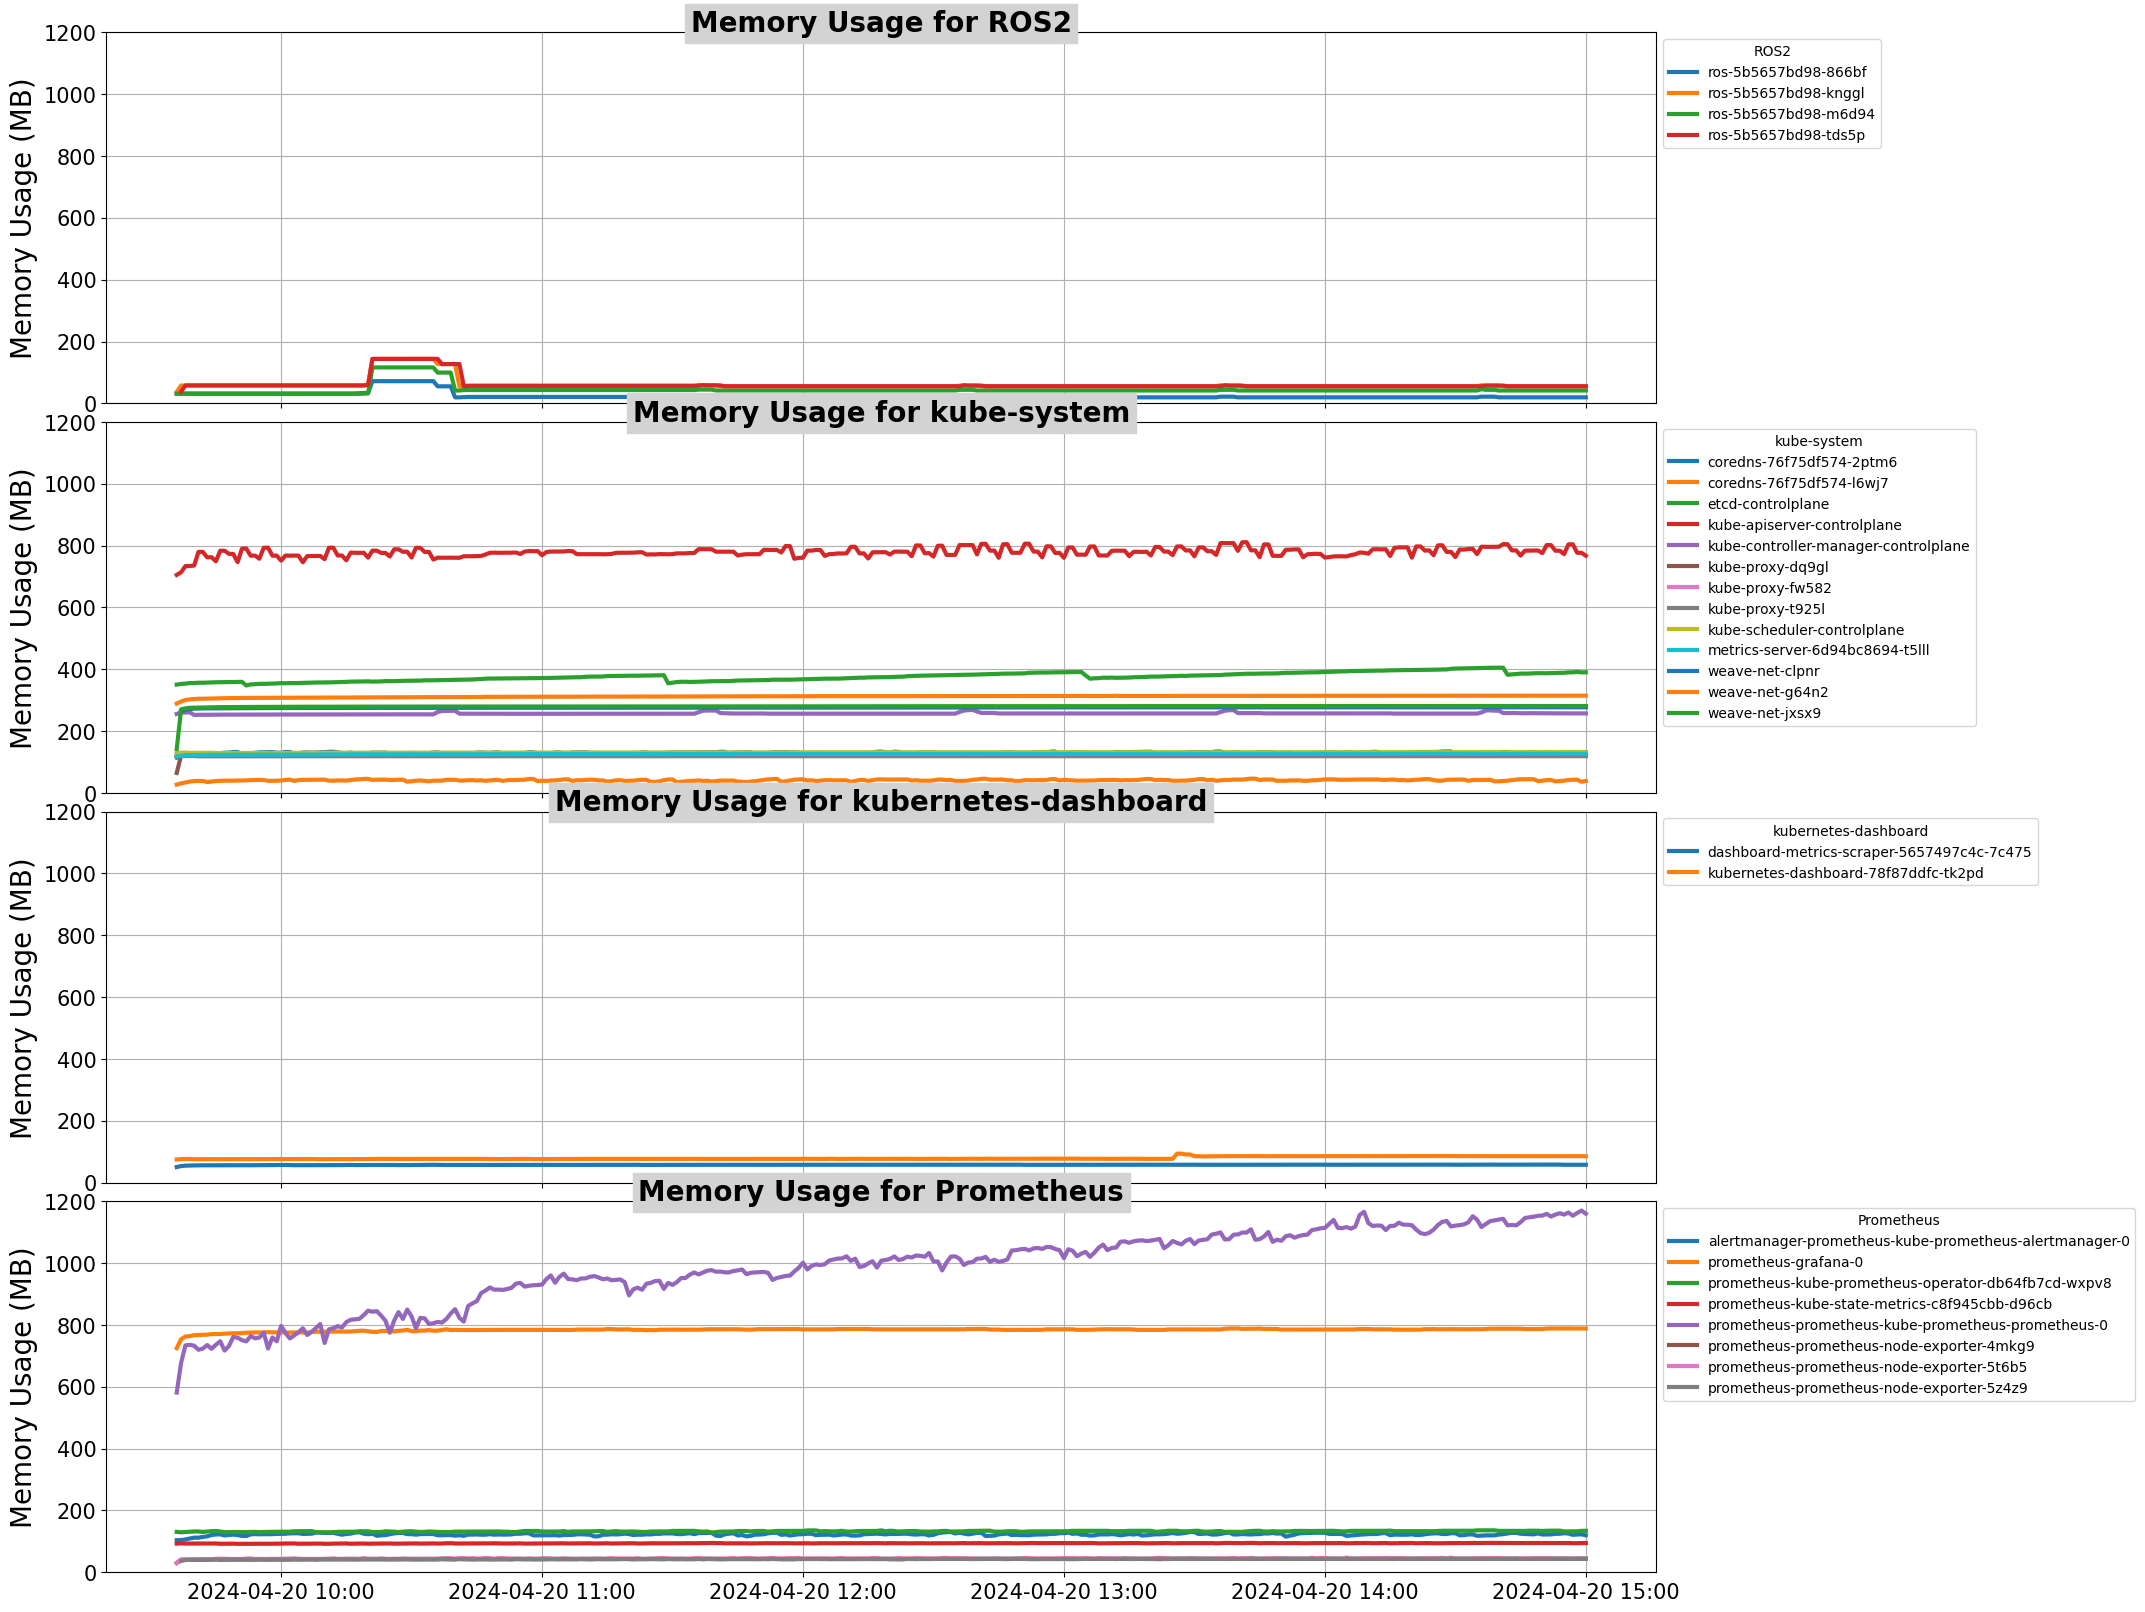

In [164]:
%reset -f 
import json
import pandas as pd
import helper as hp
import importlib as imp
from pandas import json_normalize
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib import dates as mdates
imp.reload(hp)

def transform_data(data):
    # Convert the string representation of list in the 'values' column to actual lists
    # Explode the 'values' column into multiple rows
    exploded_data = data.explode('values')

    # Split the 'values' column into 'timestamp' and 'value' columns
    exploded_data[['timestamp', 'value']] = pd.DataFrame(exploded_data['values'].tolist(), index=exploded_data.index)


    exploded_data['timestamp'] = pd.to_datetime(exploded_data['timestamp'], unit='s')
    exploded_data.drop(columns=['values'], inplace=True, axis=0)
    exploded_data.fillna("_", inplace=True)
    pivoted_data = exploded_data.pivot(index='timestamp', columns=[col for col in exploded_data.columns if col not in ['value', 'timestamp']], values='value')

    if isinstance(pivoted_data, pd.Series):
        pivoted_data = pd.DataFrame(pivoted_data, columns=['val'])
        pivoted_data.reset_index(drop=False, inplace=True)
        pivoted_data.set_index('timestamp', inplace=True) 
    
    pivoted_data.sort_index(inplace=True) 

    # Remove the name of the column index
    pivoted_data.columns.name = None    
    pivoted_data.index.name = None

    # Identify non-numeric columns
    non_numeric_columns = pivoted_data.select_dtypes(exclude=['int', 'float']).columns

    # Convert non-numeric columns to float
    for col in non_numeric_columns:
        pivoted_data[col] = pd.to_numeric(pivoted_data[col], errors='coerce')

    return pivoted_data

def json_transform(file_path, namespace):
    with open(file_path, 'rt', encoding='utf-8') as file:
        data = json.load(file)
    
    df = json_normalize(data[namespace])
    df = transform_data(json_normalize(data[namespace]))
    return df

def convert_bytes_to_readable(bytes, unit='MB'):
    """Convert bytes to higher units like MB, GB, etc."""
    factor = 1024
    if unit == 'KB':
        return bytes / factor
    elif unit == 'MB':
        return bytes / (factor ** 2)
    elif unit == 'GB':
        return bytes / (factor ** 3)
    elif unit == 'TB':
        return bytes / (factor ** 4)
    else:
        return bytes

file_path = "./dataset/container_memory_usage_bytes_pod.json"
# file_path = "./dataset/container_cpu_usage_seconds_total_pod.json"


namespaces = [ 'kube-system', 'kubernetes-dashboard', 'prometheus', 'ros']

df_ros = json_transform(file_path, namespace= 'ros')
df_kube_system = json_transform(file_path, namespace='kube-system')
df_kubernetes_dashboard = json_transform(file_path, namespace='kubernetes-dashboard')
df_prometheus = json_transform(file_path, namespace='prometheus')

df_ros = convert_bytes_to_readable(df_ros, unit='MB')
df_kube_system = convert_bytes_to_readable(df_kube_system, unit='MB')
df_kubernetes_dashboard = convert_bytes_to_readable(df_kubernetes_dashboard, unit='MB')
df_prometheus = convert_bytes_to_readable(df_prometheus, unit='MB')

dfs_memory = [df_ros, df_kube_system, df_kubernetes_dashboard, df_prometheus]
titles = ['ROS2', 'kube-system', 'kubernetes-dashboard', 'Prometheus']

start = "2024-04-20 09:10:00"
end =   "2024-04-20 15:00:00"

rows = len(dfs_memory)
fig, ax = plt.subplots(rows, 1, figsize=(20, 5*rows), sharex=True)

# Use ScalarFormatter to disable scientific notation
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)



for i in range(rows):
    for column in dfs_memory[i].columns:
        ax[i].plot(dfs_memory[i].loc[start:end, column], label=column, linewidth=3)
    ax[i].legend(title=titles[i], loc='upper left', bbox_to_anchor=(1,1)) # , markersize=5, linestyle='-'
    ax[i].grid()
    # Applying the formatter to the y-axes
    ax[i].yaxis.set_major_formatter(formatter)
    ax[i].set_ylabel('Memory Usage (MB)',fontsize=20)
    ax[i].set_title(f"Memory Usage for {titles[i]}", fontsize=20, y=0.98, ha='center', color='black', backgroundcolor='lightgrey', weight='bold')
    ax[i].set_ylim(bottom=0, top=1200)
    ax[i].tick_params(axis='y', labelsize=15)  # Adjust labelsize as needed

ax[-1].tick_params(axis='x', labelsize=15)  # Adjust labelsize as needed
# Set the date format on the x-axis
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')
ax[-1].xaxis.set_major_formatter(date_format)
plt.subplots_adjust(hspace=0.05)
plt.savefig('memory_usage.pdf', format='pdf', bbox_inches='tight')
plt.show()

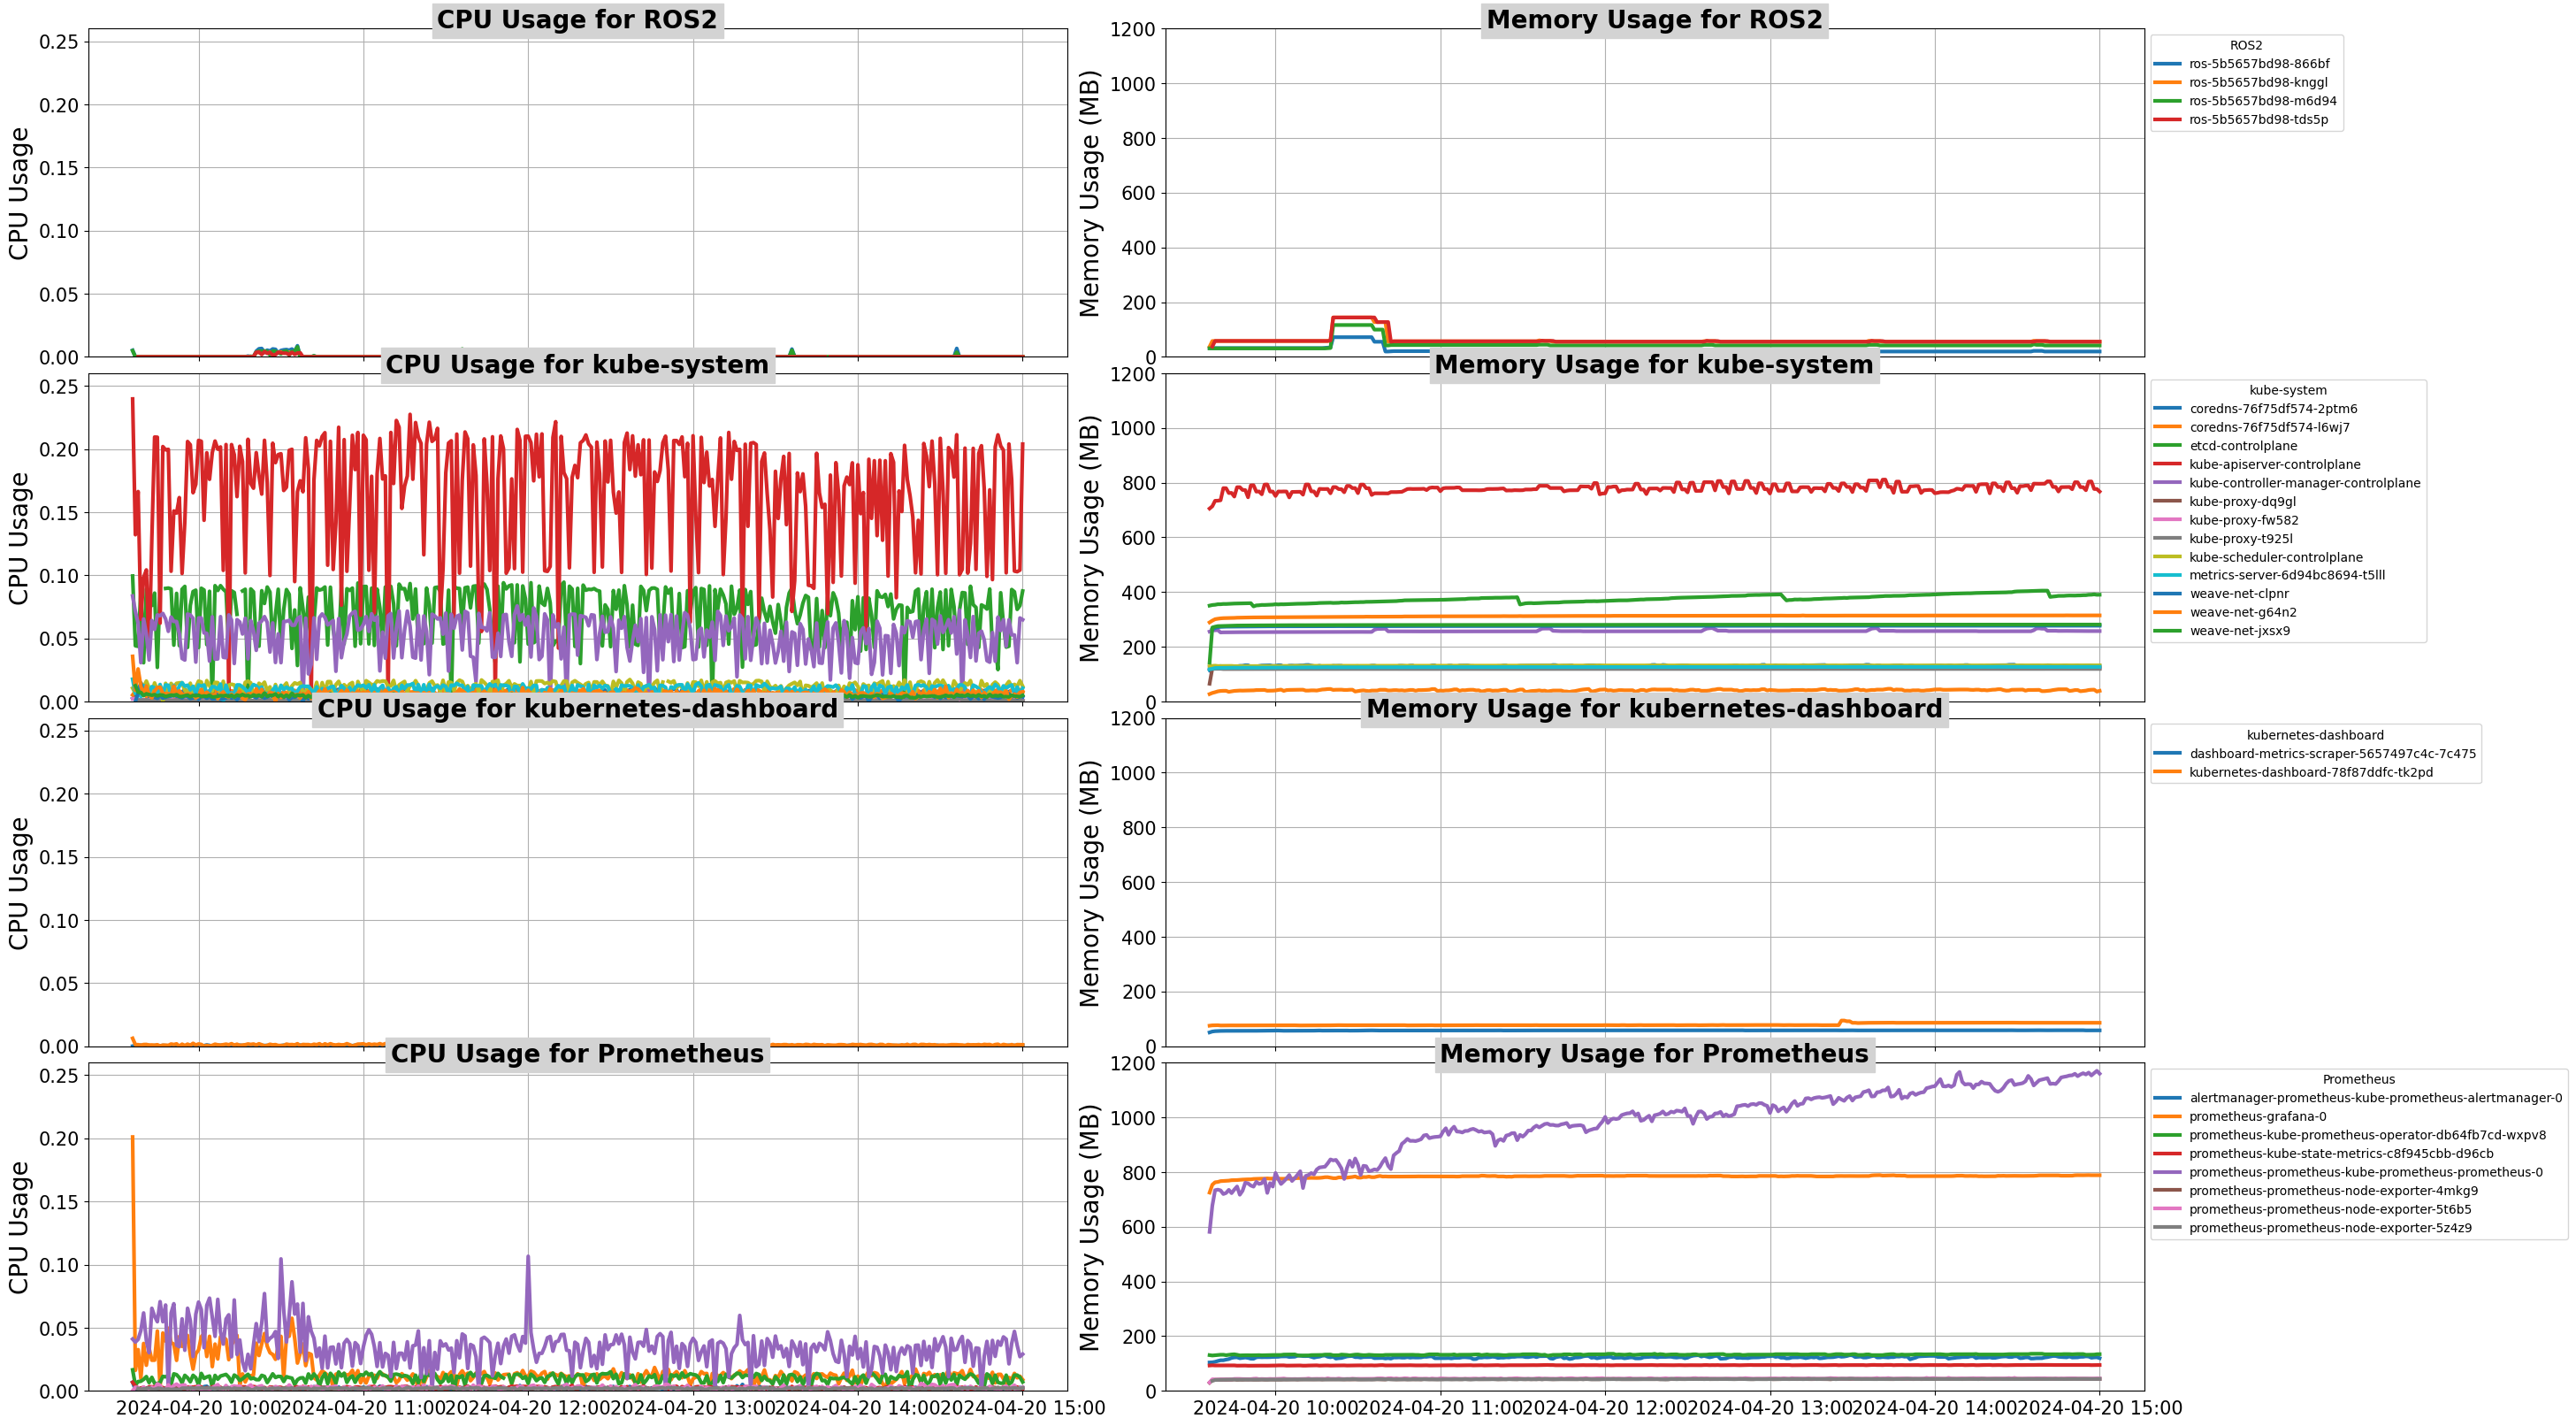

In [180]:
%reset -f 
import json
import pandas as pd
import helper as hp
import importlib as imp
from pandas import json_normalize
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib import dates as mdates
imp.reload(hp)

def transform_data(data):
    # Convert the string representation of list in the 'values' column to actual lists
    # Explode the 'values' column into multiple rows
    exploded_data = data.explode('values')

    # Split the 'values' column into 'timestamp' and 'value' columns
    exploded_data[['timestamp', 'value']] = pd.DataFrame(exploded_data['values'].tolist(), index=exploded_data.index)


    exploded_data['timestamp'] = pd.to_datetime(exploded_data['timestamp'], unit='s')
    exploded_data.drop(columns=['values'], inplace=True, axis=0)
    exploded_data.fillna("_", inplace=True)
    pivoted_data = exploded_data.pivot(index='timestamp', columns=[col for col in exploded_data.columns if col not in ['value', 'timestamp']], values='value')

    if isinstance(pivoted_data, pd.Series):
        pivoted_data = pd.DataFrame(pivoted_data, columns=['val'])
        pivoted_data.reset_index(drop=False, inplace=True)
        pivoted_data.set_index('timestamp', inplace=True) 
    
    pivoted_data.sort_index(inplace=True) 

    # Remove the name of the column index
    pivoted_data.columns.name = None    
    pivoted_data.index.name = None

    # Identify non-numeric columns
    non_numeric_columns = pivoted_data.select_dtypes(exclude=['int', 'float']).columns

    # Convert non-numeric columns to float
    for col in non_numeric_columns:
        pivoted_data[col] = pd.to_numeric(pivoted_data[col], errors='coerce')

    return pivoted_data

def json_transform(file_path, namespace):
    with open(file_path, 'rt', encoding='utf-8') as file:
        data = json.load(file)
    
    df = json_normalize(data[namespace])
    df = transform_data(json_normalize(data[namespace]))
    return df

def convert_bytes_to_readable(bytes, unit='MB'):
    """Convert bytes to higher units like MB, GB, etc."""
    factor = 1024
    if unit == 'KB':
        return bytes / factor
    elif unit == 'MB':
        return bytes / (factor ** 2)
    elif unit == 'GB':
        return bytes / (factor ** 3)
    elif unit == 'TB':
        return bytes / (factor ** 4)
    else:
        return bytes



namespaces = ['ros', 'kube-system', 'kubernetes-dashboard', 'prometheus']
titles = ['ROS2', 'kube-system', 'kubernetes-dashboard', 'Prometheus']

dfs_memory = [json_transform(file_path="./dataset/container_memory_usage_bytes_pod.json", namespace=namespace) for namespace in namespaces]
dfs_cpu = [json_transform(file_path="./dataset/container_cpu_usage_seconds_total_pod.json", namespace=namespace) for namespace in namespaces]


dfs_memory = [convert_bytes_to_readable(df, unit='MB') for df in dfs_memory]
# dfs_cpu = [convert_bytes_to_readable(df, unit='MB') for df in dfs_cpu]


start = "2024-04-20 09:10:00"
end =   "2024-04-20 15:00:00"

rows = len(dfs_memory)
fig, ax = plt.subplots(rows, 2, figsize=(30, 5*rows), sharex=True)

#  Use ScalarFormatter to disable scientific notation
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)

for i in range(rows):
    for column in dfs_cpu[i].columns:
        ax[i,0].plot(dfs_cpu[i].loc[start:end, column], label=column, linewidth=3)
    # ax[i,0].legend(title=titles[i], loc='upper left', bbox_to_anchor=(1,1)) # , markersize=5, linestyle='-'
    ax[i,0].grid()
    # Applying the formatter to the y-axes
    ax[i,0].yaxis.set_major_formatter(formatter)
    ax[i,0].set_ylabel('CPU Usage',fontsize=20)
    ax[i,0].set_title(f"CPU Usage for {titles[i]}", fontsize=20, y=0.98, ha='center', color='black', backgroundcolor='lightgrey', weight='bold')
    ax[i,0].set_ylim(bottom=0, top=0.26)
    ax[i,0].tick_params(axis='y', labelsize=15)  # Adjust labelsize as needed

ax[-1,0].tick_params(axis='x', labelsize=15)  # Adjust labelsize as needed
# Set the date format on the x-axis
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')
ax[-1,0].xaxis.set_major_formatter(date_format)


for i in range(rows):
    for column in dfs_memory[i].columns:
        ax[i,1].plot(dfs_memory[i].loc[start:end, column], label=column, linewidth=3)
    ax[i,1].legend(title=titles[i], loc='upper left', bbox_to_anchor=(1,1)) # , markersize=5, linestyle='-'
    ax[i,1].grid()
    # Applying the formatter to the y-axes
    ax[i,1].yaxis.set_major_formatter(formatter)
    ax[i,1].set_ylabel('Memory Usage (MB)',fontsize=20)
    ax[i,1].set_title(f"Memory Usage for {titles[i]}", fontsize=20, y=0.98, ha='center', color='black', backgroundcolor='lightgrey', weight='bold')
    ax[i,1].set_ylim(bottom=0, top=1200)
    ax[i,1].tick_params(axis='y', labelsize=15)  # Adjust labelsize as needed

ax[-1,1].tick_params(axis='x', labelsize=15)  # Adjust labelsize as needed
# Set the date format on the x-axis
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')
ax[-1,1].xaxis.set_major_formatter(date_format)



plt.subplots_adjust(hspace=0.05, wspace=0.1)
plt.savefig('cpu_memory_usage.pdf', format='pdf', bbox_inches='tight')
plt.show()

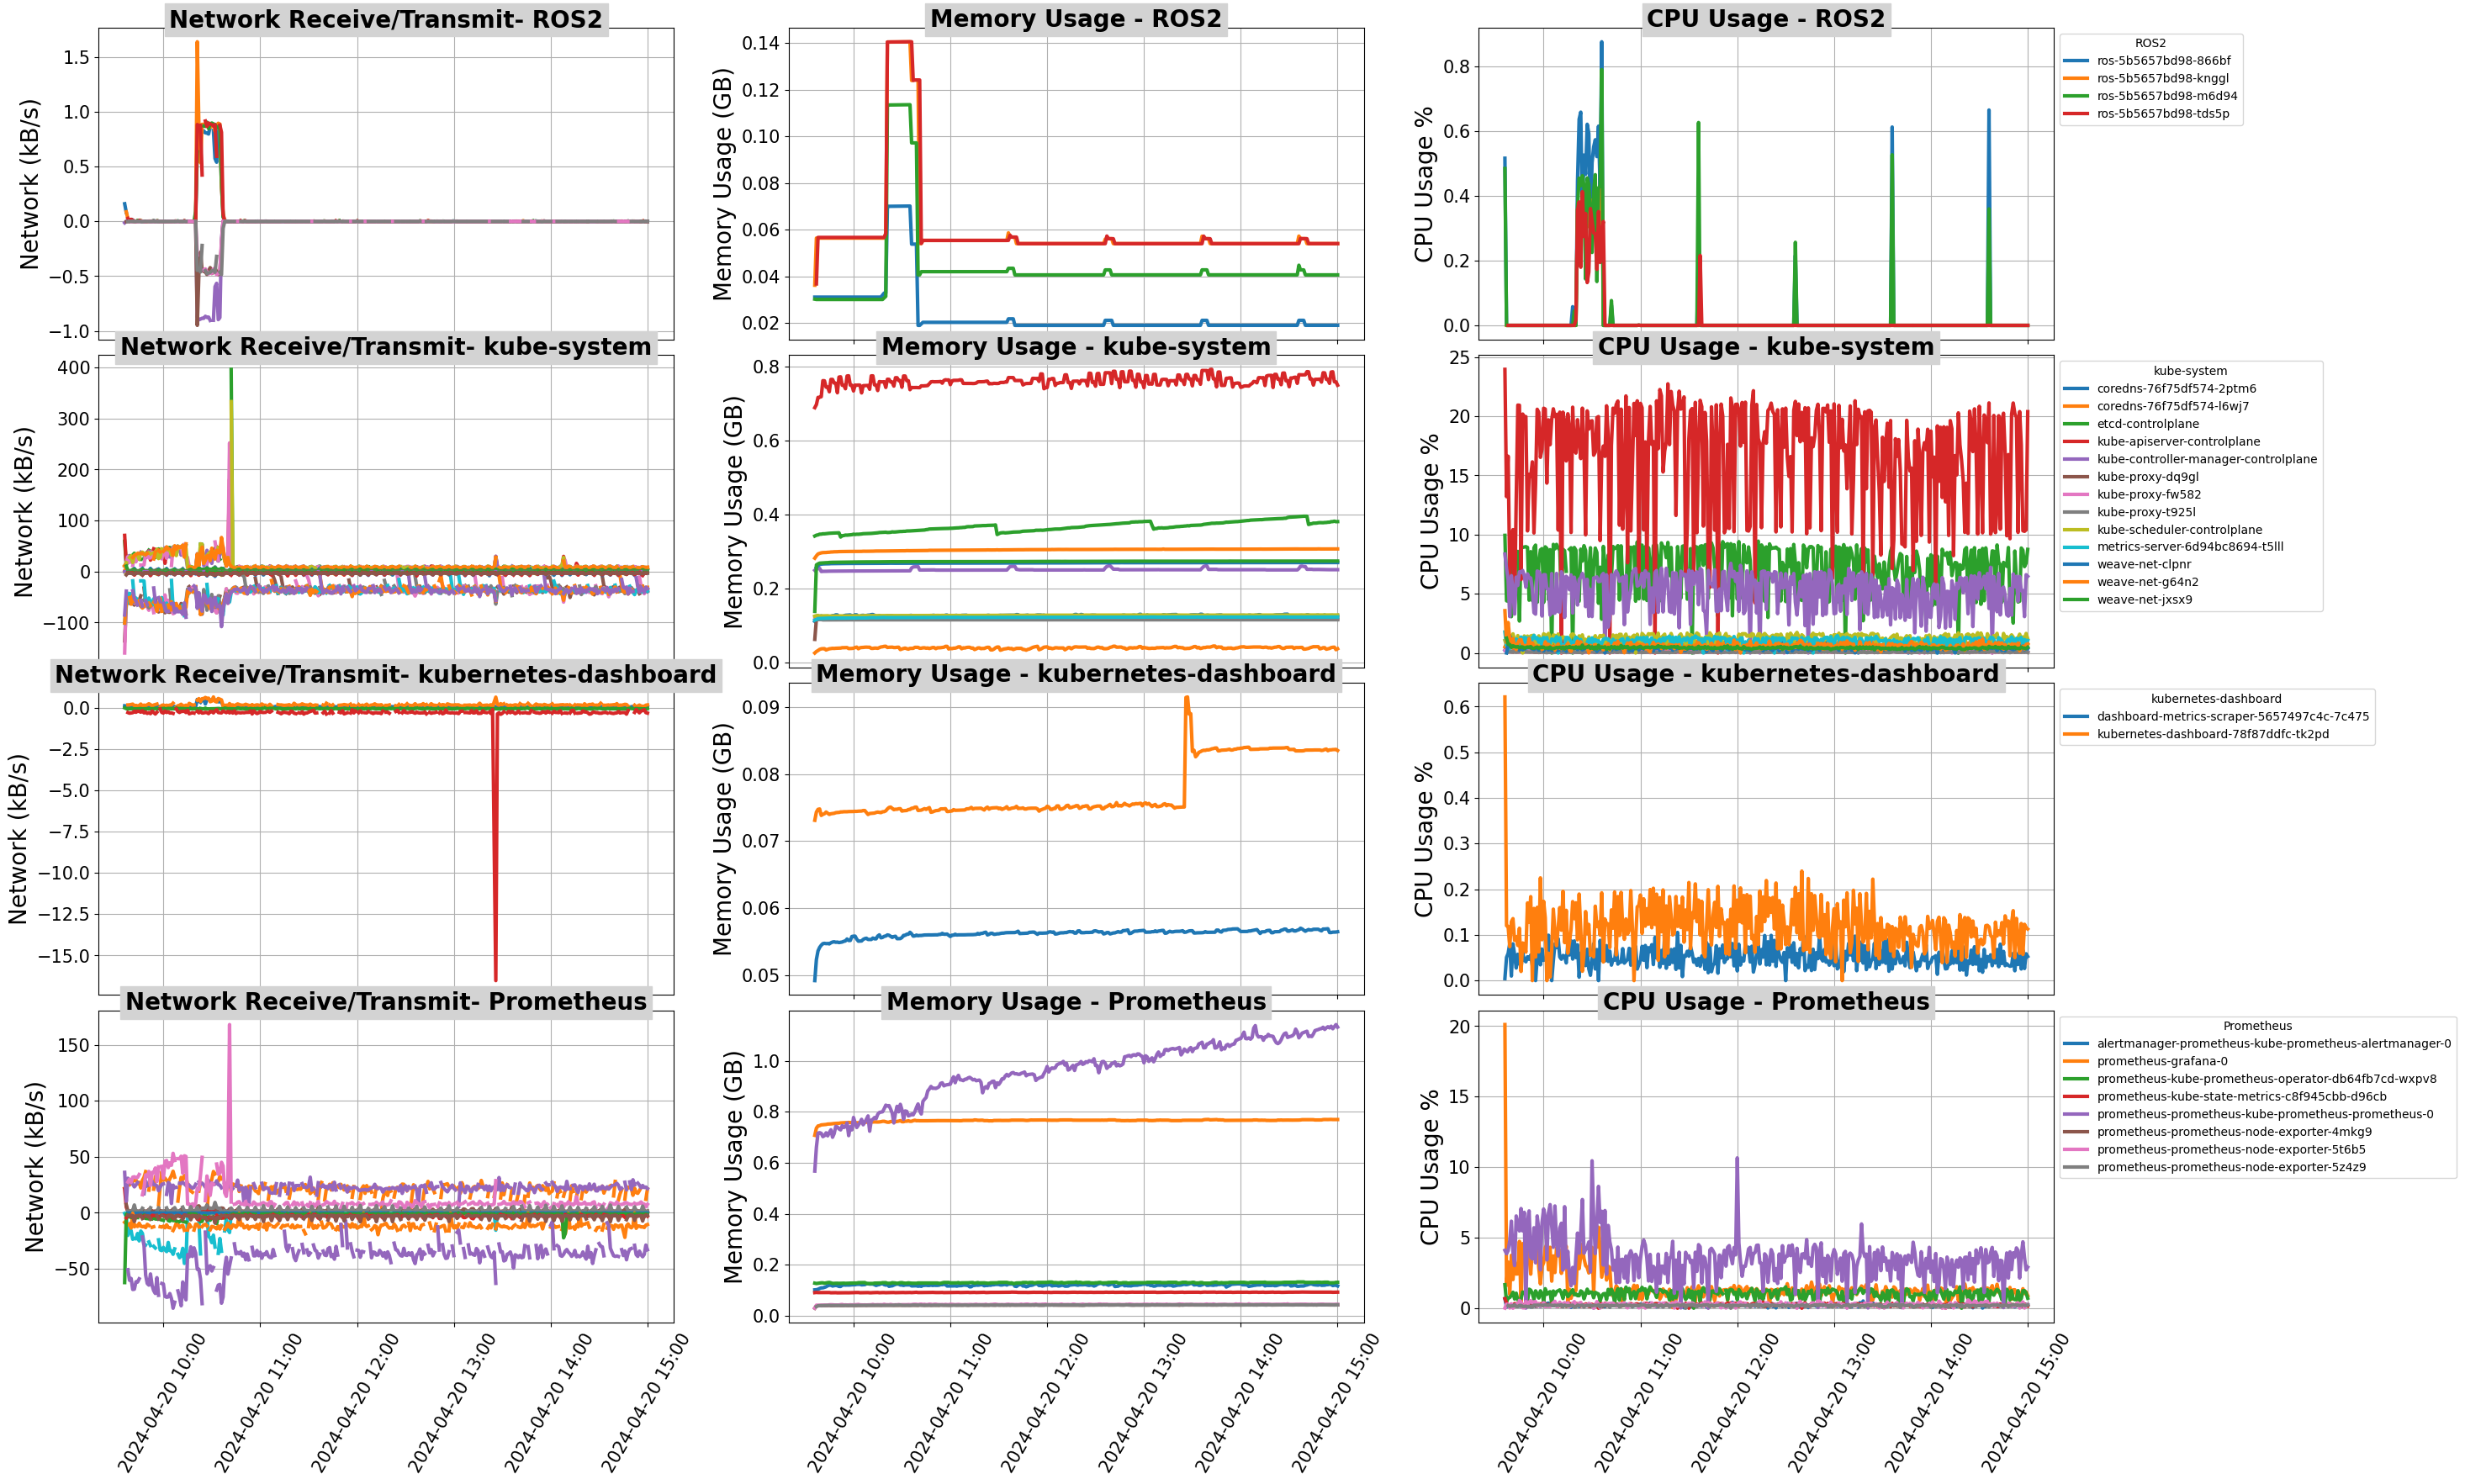

In [17]:
%reset -f 
import json
import pandas as pd
import helper as hp
import importlib as imp
from pandas import json_normalize
from matplotlib import pyplot as plt
from matplotlib import ticker
from matplotlib import dates as mdates
imp.reload(hp)

def transform_data(data):
    # Convert the string representation of list in the 'values' column to actual lists
    # Explode the 'values' column into multiple rows
    exploded_data = data.explode('values')

    # Split the 'values' column into 'timestamp' and 'value' columns
    exploded_data[['timestamp', 'value']] = pd.DataFrame(exploded_data['values'].tolist(), index=exploded_data.index)


    exploded_data['timestamp'] = pd.to_datetime(exploded_data['timestamp'], unit='s')
    exploded_data.drop(columns=['values'], inplace=True, axis=0)
    exploded_data.fillna("_", inplace=True)
    pivoted_data = exploded_data.pivot(index='timestamp', columns=[col for col in exploded_data.columns if col not in ['value', 'timestamp']], values='value')

    if isinstance(pivoted_data, pd.Series):
        pivoted_data = pd.DataFrame(pivoted_data, columns=['val'])
        pivoted_data.reset_index(drop=False, inplace=True)
        pivoted_data.set_index('timestamp', inplace=True) 
    
    pivoted_data.sort_index(inplace=True) 

    # Remove the name of the column index
    pivoted_data.columns.name = None    
    pivoted_data.index.name = None

    # Identify non-numeric columns
    non_numeric_columns = pivoted_data.select_dtypes(exclude=['int', 'float']).columns

    # Convert non-numeric columns to float
    for col in non_numeric_columns:
        pivoted_data[col] = pd.to_numeric(pivoted_data[col], errors='coerce')

    return pivoted_data

def json_transform(file_path, namespace):
    with open(file_path, 'rt', encoding='utf-8') as file:
        data = json.load(file)
    
    df = json_normalize(data[namespace])
    df = transform_data(json_normalize(data[namespace]))
    return df

def convert_bytes_to_readable(bytes, unit='MB'):
    """Convert bytes to higher units like MB, GB, etc."""
    factor = 1024
    if unit == 'KB':
        return bytes / factor
    elif unit == 'MB':
        return bytes / (factor ** 2)
    elif unit == 'GB':
        return bytes / (factor ** 3)
    elif unit == 'TB':
        return bytes / (factor ** 4)
    else:
        return bytes



namespaces = ['ros', 'kube-system', 'kubernetes-dashboard', 'prometheus']
titles = ['ROS2', 'kube-system', 'kubernetes-dashboard', 'Prometheus']

dfs_memory = [json_transform(file_path="./dataset/container_memory_usage_bytes_pod.json", namespace=namespace) for namespace in namespaces]
dfs_cpu = [json_transform(file_path="./dataset/container_cpu_usage_seconds_total_pod.json", namespace=namespace) for namespace in namespaces]

# Concatenating DataFrames along the columns
dfs_net = [pd.concat([
    json_transform(file_path="./dataset/container_network_receive_bytes_total_pod.json", namespace=namespace).add_suffix("_receive"),
    -json_transform(file_path="./dataset/container_network_transmit_bytes_total_pod.json", namespace=namespace).add_suffix("_transmit")
    ], axis=1) for namespace in namespaces]
# dfs_rec = [json_transform(file_path="./dataset/container_network_receive_bytes_total_pod.json", namespace=namespace) for namespace in namespaces]
# dfs_trans = [json_transform(file_path="./dataset/container_network_transmit_bytes_total_pod.json", namespace=namespace) for namespace in namespaces]



dfs_memory = [convert_bytes_to_readable(df, unit='GB') for df in dfs_memory]
dfs_net = [convert_bytes_to_readable(df, unit='KB') for df in dfs_net]
dfs_cpu = [df*100 for df in dfs_cpu]


start = "2024-04-20 09:10:00"
end =   "2024-04-20 15:00:00"

rows = len(dfs_memory)
fig, ax = plt.subplots(rows, 3, figsize=(30, 5*rows), sharex=True)

#  Use ScalarFormatter to disable scientific notation
formatter = ticker.ScalarFormatter(useOffset=False)
formatter.set_scientific(False)


for i in range(rows):
    for column in dfs_net[i].columns:
        ax[i,0].plot(dfs_net[i].loc[start:end, column], label=column, linewidth=3)
    # ax[i,0].legend(title=titles[i], loc='upper left', bbox_to_anchor=(1,1)) # , markersize=5, linestyle='-'
    ax[i,0].grid()
    # Applying the formatter to the y-axes
    ax[i,0].yaxis.set_major_formatter(formatter)
    ax[i,0].set_ylabel('Network (kB/s)',fontsize=20)
    ax[i,0].set_title(f"Network Receive/Transmit- {titles[i]}", fontsize=20, y=0.98, ha='center', color='black', backgroundcolor='lightgrey', weight='bold')
    # ax[i,0].set_ylim(bottom=0, top=1200)
    ax[i,0].tick_params(axis='y', labelsize=15)  # Adjust labelsize as needed




    for column in dfs_memory[i].columns:
        ax[i,1].plot(dfs_memory[i].loc[start:end, column], label=column, linewidth=3)
    # ax[i,1].legend(title=titles[i], loc='upper left', bbox_to_anchor=(1,1)) # , markersize=5, linestyle='-'
    ax[i,1].grid()
    # Applying the formatter to the y-axes
    ax[i,1].yaxis.set_major_formatter(formatter)
    ax[i,1].set_ylabel('Memory Usage (GB)',fontsize=20)
    ax[i,1].set_title(f"Memory Usage - {titles[i]}", fontsize=20, y=0.98, ha='center', color='black', backgroundcolor='lightgrey', weight='bold')
    # ax[i,1].set_ylim(bottom=0, top=1200)
    ax[i,1].tick_params(axis='y', labelsize=15)  # Adjust labelsize as needed




    for column in dfs_cpu[i].columns:
        ax[i,2].plot(dfs_cpu[i].loc[start:end, column], label=column, linewidth=3)
    ax[i,2].legend(title=titles[i], loc='upper left', bbox_to_anchor=(1,1)) # , markersize=5, linestyle='-'
    ax[i,2].grid()
    # Applying the formatter to the y-axes
    ax[i,2].yaxis.set_major_formatter(formatter)
    ax[i,2].set_ylabel('CPU Usage %',fontsize=20)
    ax[i,2].set_title(f"CPU Usage - {titles[i]}", fontsize=20, y=0.98, ha='center', color='black', backgroundcolor='lightgrey', weight='bold')
    # ax[i,2].set_ylim(bottom=0, top=0.26)
    ax[i,2].tick_params(axis='y', labelsize=15)  # Adjust labelsize as needed


# Set the date format on the x-axis
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')

for j in range(3):
    ax[-1,j].tick_params(axis='x', labelsize=15, rotation=60)  # Adjust labelsize as needed
    ax[-1,j].xaxis.set_major_formatter(date_format)
    


plt.subplots_adjust(hspace=0.05, wspace=0.2)
plt.savefig('cpu_memory_net.pdf', format='pdf', bbox_inches='tight')
plt.show()